# 1. Import libraries & import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv('F:/DS/craigslist-used car raw data/vehicles.csv')

# 2. Data cleaning
## 2.1 check the information

In [6]:
df.shape

(509577, 25)

In [7]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [8]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

## 2.2 Drop the unnecessary columns

In [9]:
#drop the useless column
drop_columns=['county','url','region_url','vin','image_url','fuel','cylinders','lat','long','state','description','size','type']
df=df.drop(columns=drop_columns)

## 2.3 Deal with missing data

In [10]:
#check the isnull number
df.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
odometer         92324
title_status      3062
transmission      3719
drive           144143
paint_color     164706
dtype: int64

In [11]:
#fillter the columns need to be filled by float and object
for n in df.drop(['manufacturer','model','paint_color'],axis=1).columns:
    if df[n].dtype=='float':
        df[n]=df[n].fillna(df[n].mean())
    if df[n].dtype=='object':
        df[n]=df[n].fillna(df[n].mode()[0])

In [12]:
#fill other columns
df['year']=df['year'].fillna(df['year'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna('unkonwn')
df['model']=df['model'].fillna('unknown')
df['paint_color']=df['paint_color'].fillna('unknown')

In [13]:
#check the isnull number
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
dtype: int64

## 2.4 Drop the fake data

In [14]:
#replace the 0 value by median
df['price']=df['price'].replace(0,df['price'].median())
df['odometer']=df['odometer'].replace(0,df['odometer'].median())

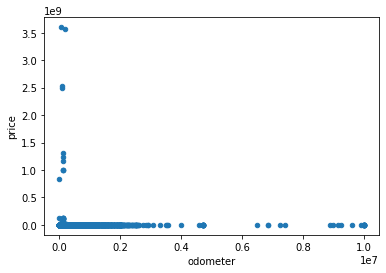

In [15]:
#check the fake max data
df.plot(kind='scatter',x='odometer',y='price')

In [16]:
df['price'].max()

3600028900

In [17]:
#set a gross range of samples
df1=df[df['price']<200000]
clean_data=df1[df1['odometer']<400000]

In [18]:
#replace the fake min data by median
clean_data['price']=clean_data['price'].replace(0,clean_data['price'].median())
clean_data['odometer']=clean_data['odometer'].replace(0,clean_data['odometer'].median())

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


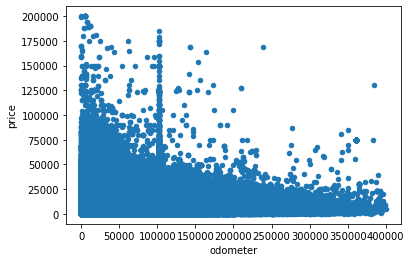

In [19]:
clean_data.plot(kind='scatter',x='odometer',y='price')

In [20]:
#devide the odometer into three classes
class_div=(clean_data['odometer'].max()-clean_data['odometer'].min())/3
class1=clean_data['odometer'].min()+class_div
class2=class1+class_div
class3=class2+class_div

In [21]:
print(class_div)
print(class1)
print(class2)
print(class3)
print(clean_data['odometer'].min)

133332.66666666666
133333.66666666666
266666.3333333333
399999.0
<bound method Series.min of 0          63500.0
1             10.0
2           7554.0
3             10.0
4          70150.0
            ...   
509572    103135.0
509573    108277.0
509574      6973.0
509575     37520.0
509576    152296.0
Name: odometer, Length: 508092, dtype: float64>


In [22]:
def odometer_class(n):
    if n<class1:
        return 'low odometer'
    if n>class1 and n<class2:
        return'medium odometer'
    else:
        return'high odometer'
clean_data['odometer_class']=clean_data['odometer'].apply(odometer_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
clean_data[['odometer_class','odometer','price']].head(10)

,odometer_class,odometer,price
0,low odometer,63500.0,17899
1,low odometer,10.0,9377
2,low odometer,7554.0,46463
3,low odometer,10.0,9377
4,low odometer,70150.0,49999
5,low odometer,120057.0,13999
6,low odometer,95484.0,34500
7,low odometer,89340.0,14500
8,medium odometer,226031.0,12500
9,low odometer,128153.0,34500


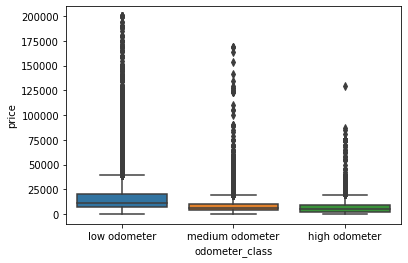

In [24]:
#detecting outlier by box chart
sns.boxplot(x='odometer_class', y='price', data=clean_data)

In [25]:
#get the iqr of price
from scipy.stats import iqr
iqr=iqr(clean_data['price'])
iqr

12218.5

In [26]:
price_stats=clean_data['price'].describe()
price_stats

count    508092.000000
mean      13260.830281
std       11173.090564
min           1.000000
25%        5731.500000
50%        9377.000000
75%       17950.000000
max      199997.000000
Name: price, dtype: float64

In [27]:
#get the upper and lower bound
Q3=price_stats['75%']
upper_bound=Q3+(iqr*1.5)
Q1=price_stats['25%']
lower_bound=Q1-(iqr*1.5)
print(upper_bound)
print(lower_bound)

36277.75
-12596.25


In [28]:
outlier_above=[n for n in clean_data['price'].values if n>upper_bound]

In [29]:
#delete outliers
clean_data=clean_data[~clean_data['price'].isin(outlier_above)]

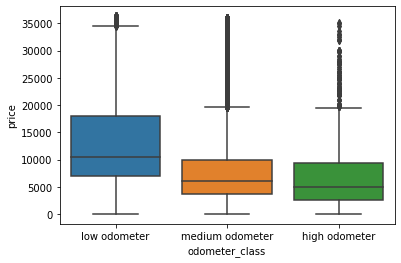

In [30]:
sns.boxplot(x='odometer_class', y='price', data=clean_data)

# 3.visualization

In [31]:
clean_data.head(10)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,63500.0,clean,manual,4wd,black,low odometer
1,7034440610,salt lake city,9377,2016.0,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer
3,7034440546,salt lake city,9377,2016.0,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer
5,7034406582,salt lake city,13999,2009.0,ram,unknown,excellent,120057.0,clean,automatic,4wd,silver,low odometer
6,7034405619,salt lake city,34500,2017.0,ford,f-350,excellent,95484.0,clean,automatic,4wd,white,low odometer
7,7034405349,salt lake city,14500,2007.0,gmc,sierra,excellent,89340.0,clean,automatic,4wd,unknown,low odometer
8,7034404595,salt lake city,12500,2013.0,ford,f-250,excellent,226031.0,clean,automatic,4wd,white,medium odometer
9,7034401857,salt lake city,34500,2012.0,ram,unknown,excellent,128153.0,clean,automatic,4wd,silver,low odometer
10,7034401494,salt lake city,5900,1994.0,ford,f-250,excellent,168838.0,clean,manual,4wd,white,medium odometer
11,7034400341,salt lake city,16500,2013.0,gmc,yukon,excellent,156385.0,clean,automatic,4wd,silver,medium odometer


### average odometer of each manufacturer 

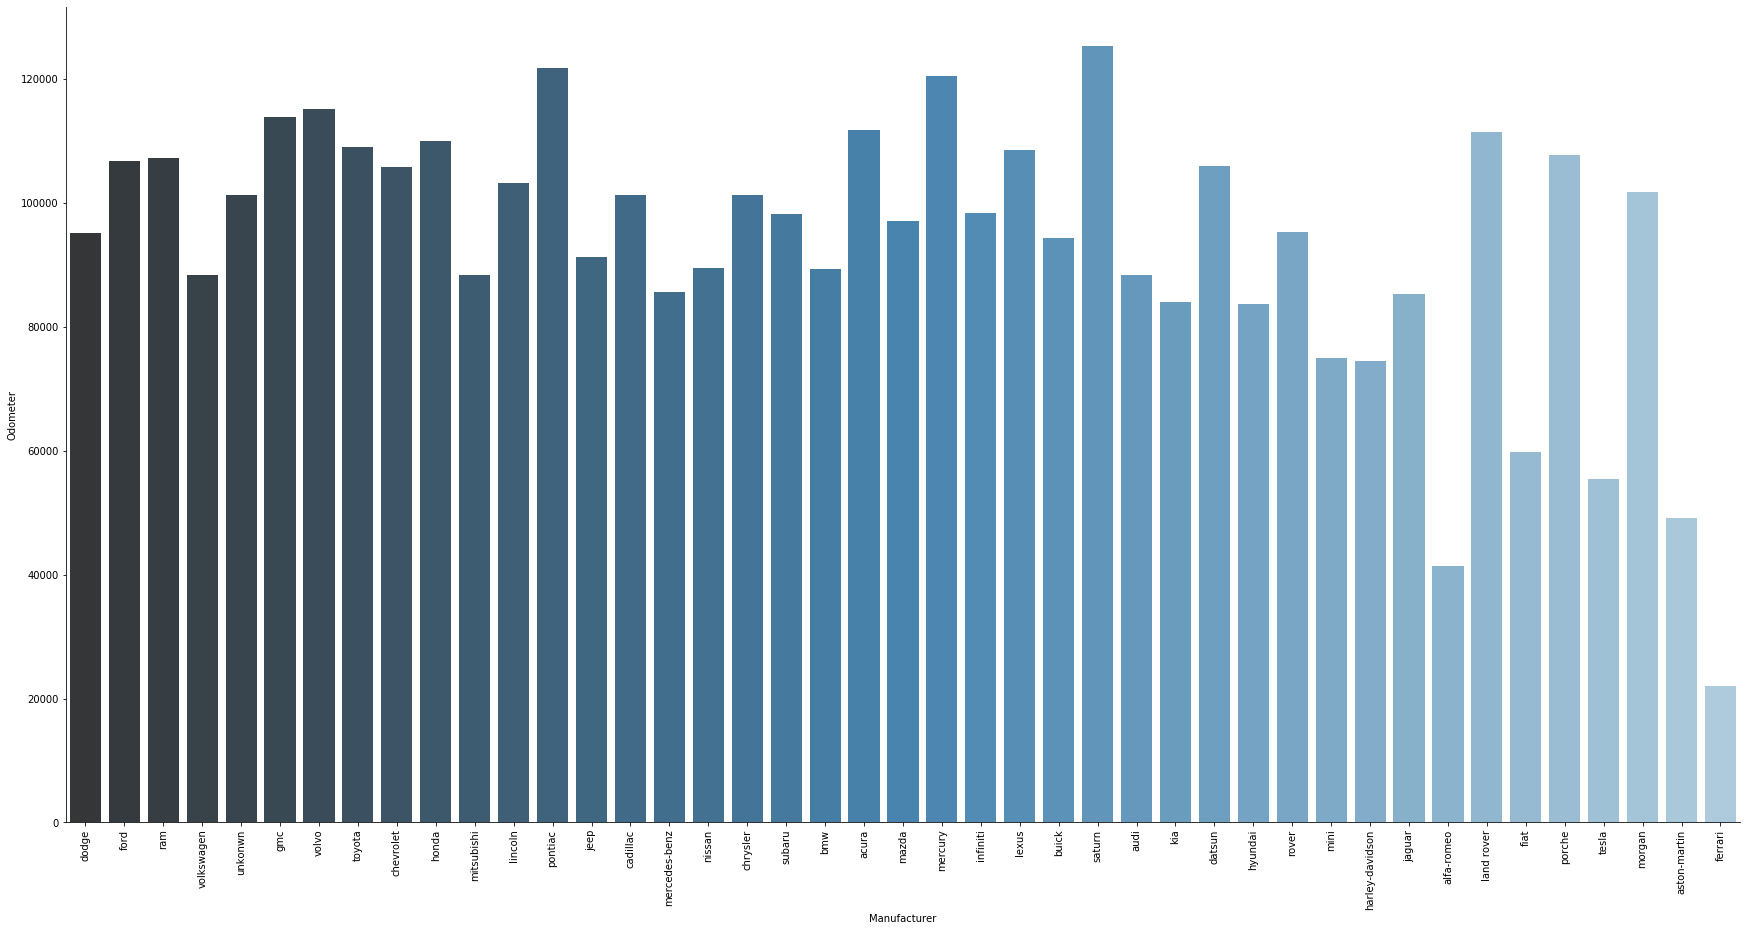

In [32]:
clean_data=clean_data.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=clean_data.manufacturer, palette="Blues_d",y=clean_data.odometer,ci=None)
sns.despine()
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.show()


From the bar chart we could know that **Saturn** have the most miles when they are on second-hand sale.

### average price of each manufacturer 

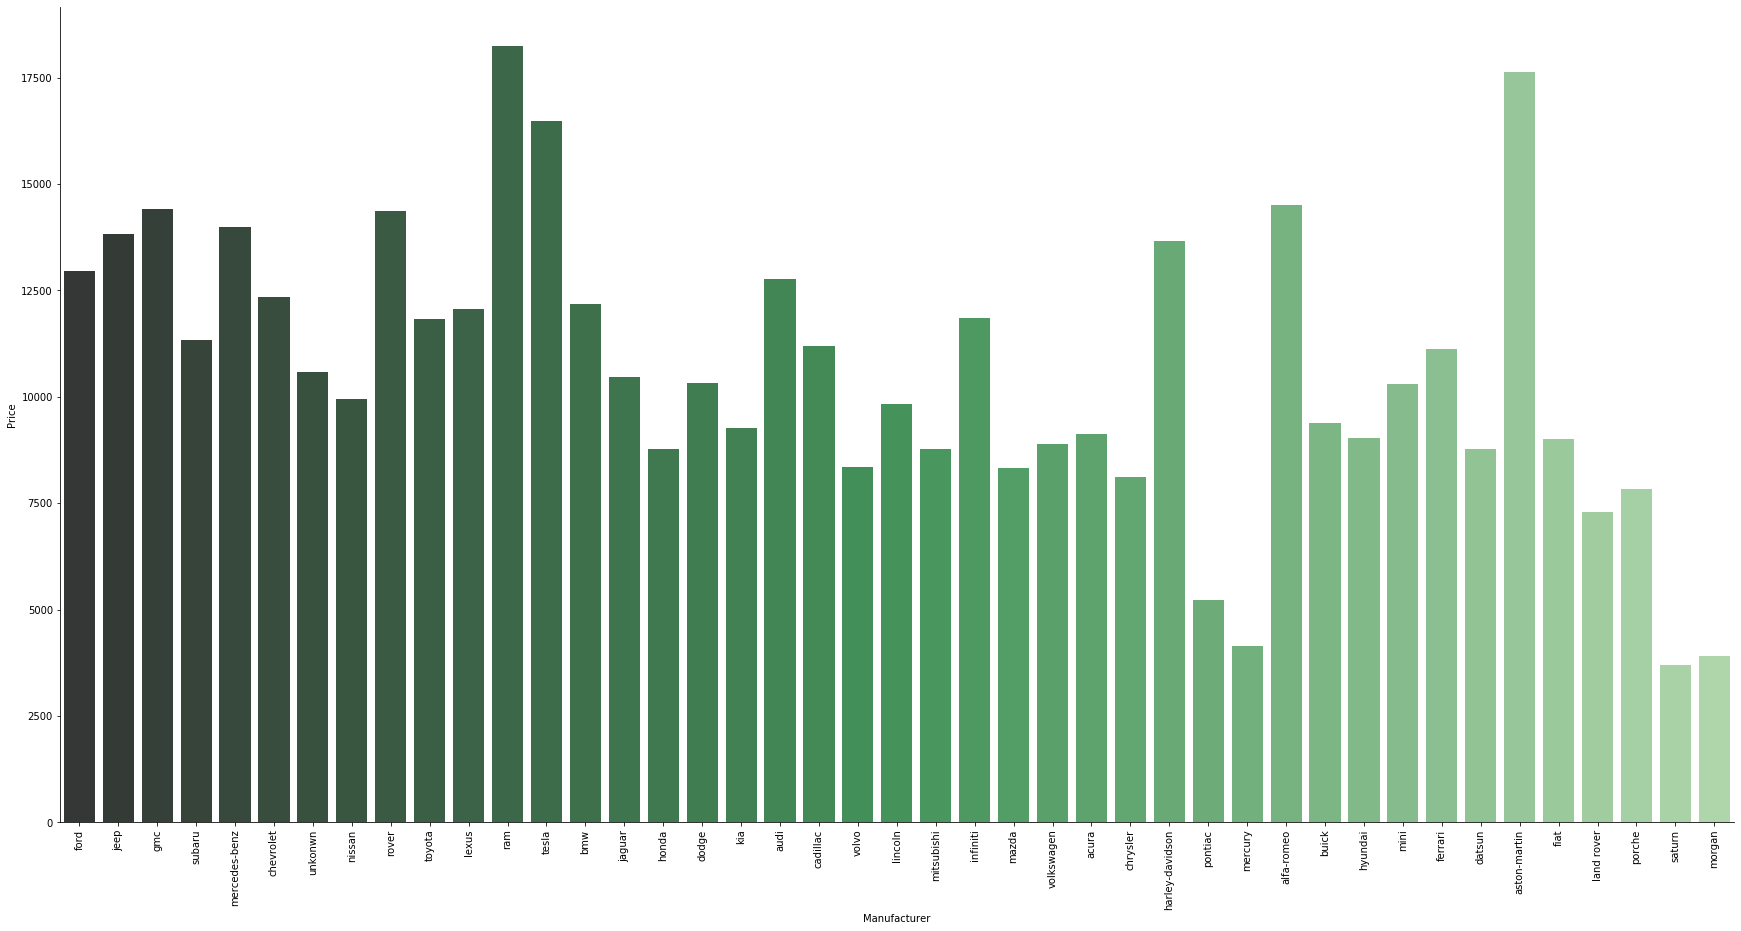

In [33]:
clean_data=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=clean_data.manufacturer, y=clean_data.price,palette='Greens_d',ci=None)
sns.despine()
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

We could know that among used cars, **ram** usually has the average highest price.

### average odometer trend of Ram

In [34]:
ram_data=clean_data.loc[clean_data['manufacturer']=='ram']

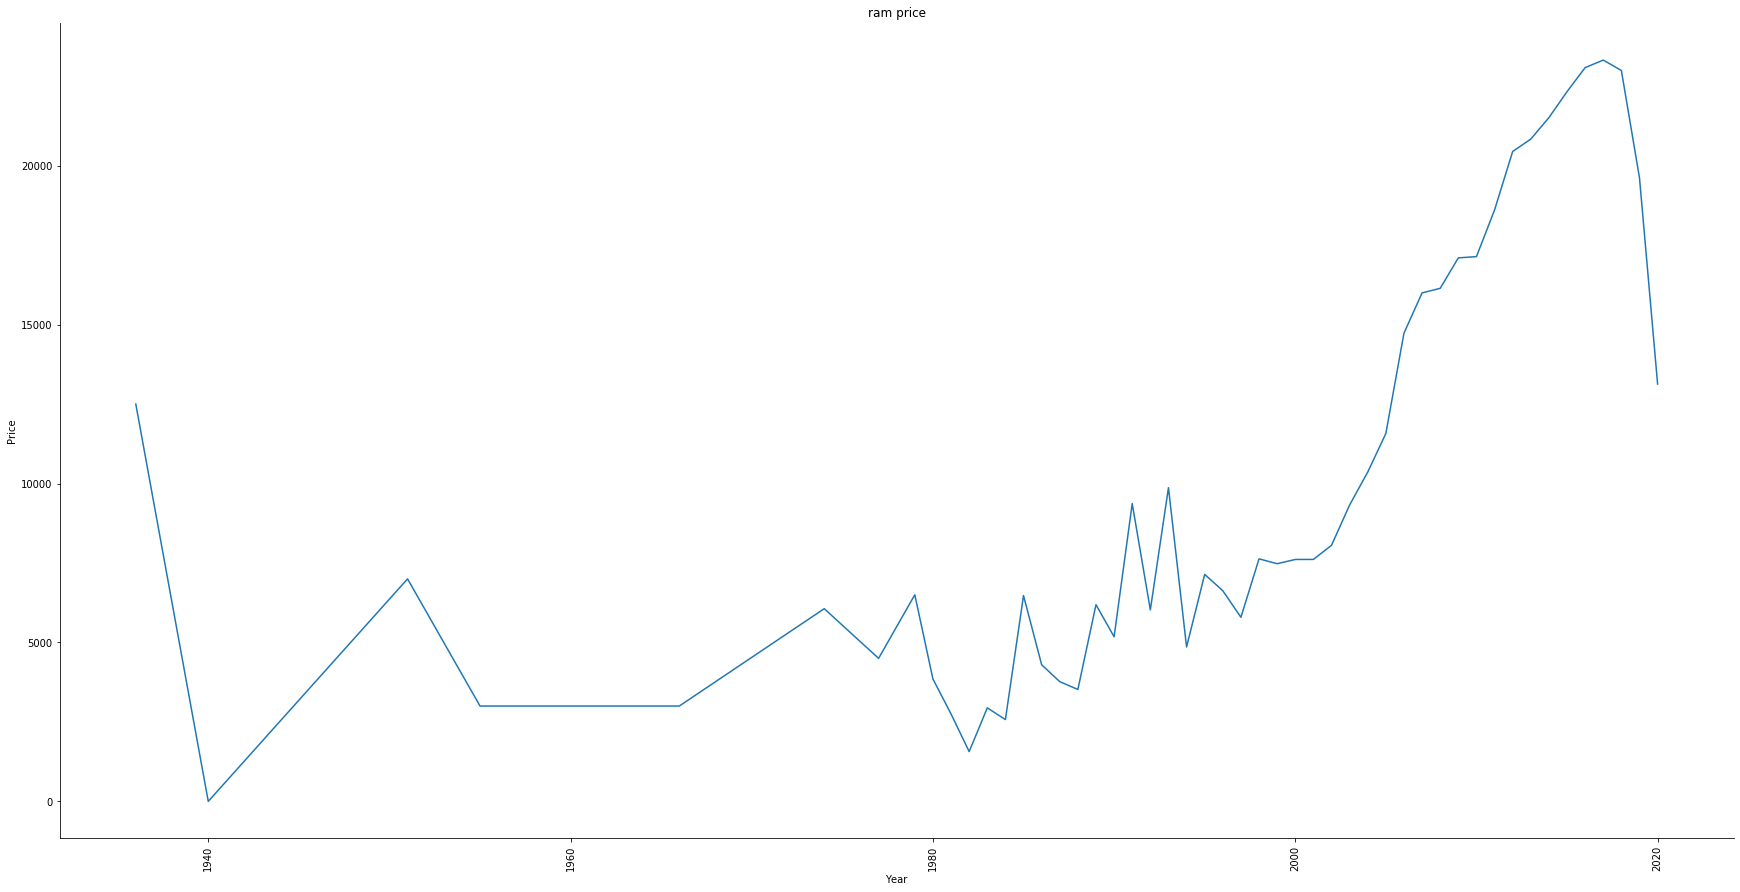

In [35]:
ram_data=ram_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.lineplot(x=ram_data.year, y=ram_data.price, ci=None)
sns.despine()
plt.title('ram price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### Which Drive takes the largets share of the market

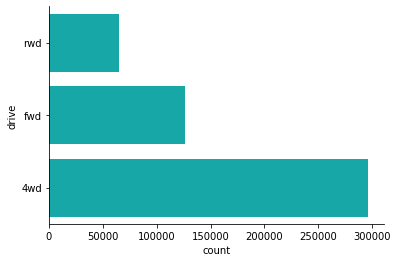

In [36]:
clean_data=clean_data.sort_values(by=['drive'],ascending=False)
sns.countplot(y='drive',data=clean_data,color='c')
sns.despine()
plt.show()

### Which color usually has a higher price 

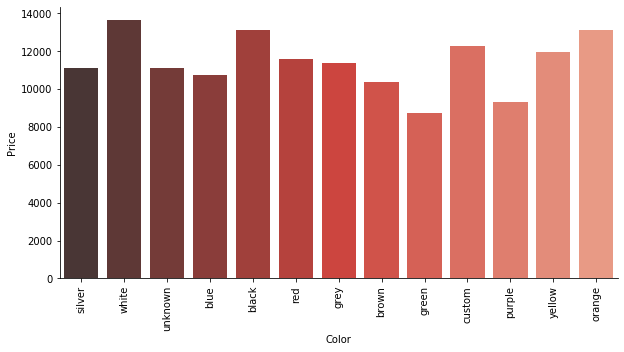

In [37]:
clean_data=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=clean_data.paint_color, y=clean_data.price,palette='Reds_d',ci=None)
sns.despine()
plt.xticks(rotation= 90)
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

### Which color takes the largets share of the market

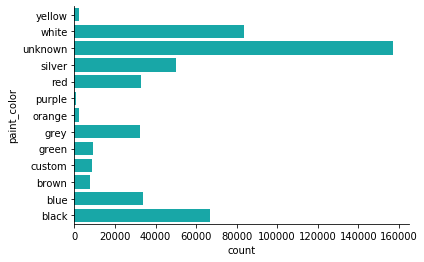

In [38]:
clean_data=clean_data.sort_values(by=['paint_color'],ascending=False)
sns.countplot(y='paint_color',data=clean_data,color='c')
sns.despine()
plt.show()

### average price trend of  the past 20 years

In [39]:
#pivot tha data frame by years
year_odometer_price=clean_data.pivot_table(clean_data,index=['year'],aggfunc=[np.mean])
year_odometer_price=year_odometer_price.loc[(year_odometer_price.index>2000)&(year_odometer_price.index<2020)]
year_odometer_price.head(10)                  
year_odometer_price.columns

MultiIndex([('mean',       'id'),
            ('mean', 'odometer'),
            ('mean',    'price')],
           )

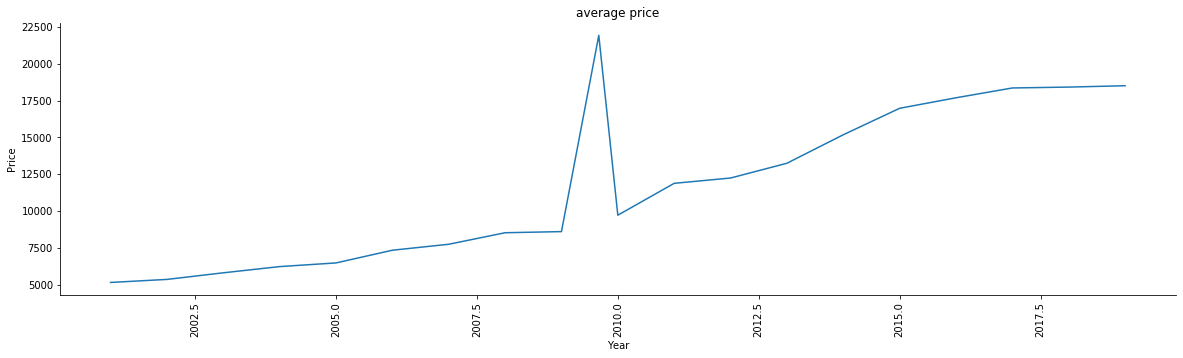

In [40]:
#the price trend
plt.figure(figsize=(20,5))
sns.lineplot(x=year_odometer_price.index, y=year_odometer_price['mean']['price'], ci=None)
sns.despine()
plt.title('average price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### average odometer trend of  the past 20 years

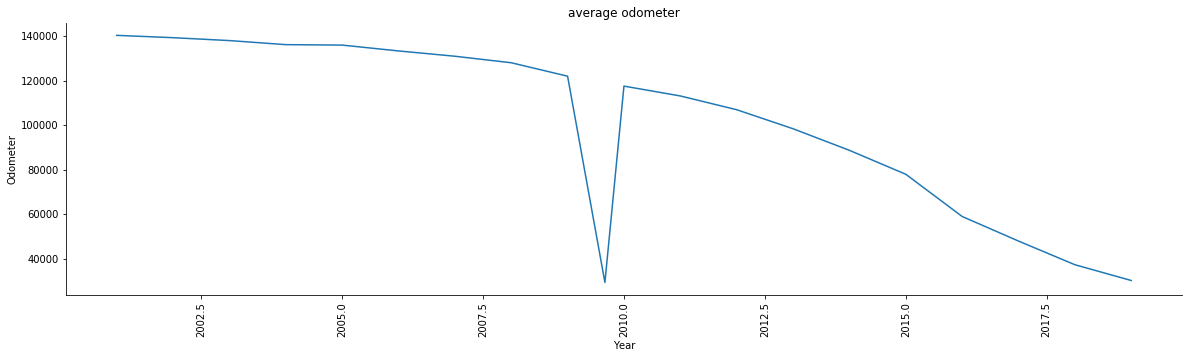

In [41]:
plt.figure(figsize=(20,5))
sns.lineplot(x=year_odometer_price.index, y=year_odometer_price['mean']['odometer'], ci=None)
sns.despine()
plt.title('average odometer')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.show()

### the price trend of the most popolar 5 manufacturers in the past 20 years

In [42]:
#get the the most popolar 5 manufacturers 
#the 5 most popular manufacturer in uesed car market are 'ford','chevrolet','toyota','nissan','honda'
clean_data['manufacturer'].value_counts().head(5)

ford         87258
chevrolet    70061
toyota       37426
nissan       26246
honda        25488
Name: manufacturer, dtype: int64

In [43]:
#get the ford price trend
ford_out=clean_data[clean_data['manufacturer']=='ford']
ford_average=ford_out.pivot_table(ford_out,index=['year'],aggfunc=[np.mean])
ford_average.columns=[ 'ford_id','ford_odometer','ford_price']

In [44]:
#get the chevrolet price trend
chevrolet_out=clean_data[clean_data['manufacturer']=='chevrolet']
chevrolet_average=chevrolet_out.pivot_table(chevrolet_out,index=['year'],aggfunc=[np.mean])
chevrolet_average.columns=[ 'chevrolet_id','chevrolet_odometer','chevrolet_price']

In [45]:
#get the toyota price trend
toyota_out=clean_data[clean_data['manufacturer']=='toyota']
toyota_average=toyota_out.pivot_table(toyota_out,index=['year'],aggfunc=[np.mean])
toyota_average.columns=[ 'toyota_id','toyota_odometer','toyota_price']

In [46]:
#get the cnissan price trend
nissan_out=clean_data[clean_data['manufacturer']=='nissan']
nissan_average=nissan_out.pivot_table(nissan_out,index=['year'],aggfunc=[np.mean])
nissan_average.columns=[ 'nissan_id','nissan_odometer','nissan_price']

In [47]:
#get the honta price trend
honda_out=clean_data[clean_data['manufacturer']=='honda']
honda_average=honda_out.pivot_table(honda_out,index=['year'],aggfunc=[np.mean])
honda_average.columns=[ 'honda_id','honda_odometer','honda_price']

In [48]:
#concat the 5 data frame
car_price_concat = pd.concat([ford_average,chevrolet_average,toyota_average,nissan_average,honda_average], axis=1)
car_price_concat.head(5)

,ford_id,ford_odometer,ford_price,chevrolet_id,chevrolet_odometer,chevrolet_price,toyota_id,toyota_odometer,toyota_price,nissan_id,nissan_odometer,nissan_price,honda_id,honda_odometer,honda_price
year,,,,,,,,,,,,,,,
1900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.047514e+09,101729.961515,10899.0
1901.0,7.035924e+09,101729.961515,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911.0,7.048696e+09,101729.961515,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914.0,7.044256e+09,101729.961515,18500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1917.0,7.046573e+09,71975.980757,12250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
car_price_concat.index.astype(int)

Int64Index([1900, 1901, 1911, 1914, 1917, 1919, 1920, 1922, 1923, 1924,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='year', length=107)

In [50]:
#filter the year of past 20 years
car_price_trend=car_price_concat.loc[(car_price_concat.index>2000)&(car_price_concat.index<2020)]

In [51]:
car_price_trend.head(5)

,ford_id,ford_odometer,ford_price,chevrolet_id,chevrolet_odometer,chevrolet_price,toyota_id,toyota_odometer,toyota_price,nissan_id,nissan_odometer,nissan_price,honda_id,honda_odometer,honda_price
year,,,,,,,,,,,,,,,
2001.0,7.044352e+09,145997.003393,6607.172748,7.044179e+09,138148.416909,5811.878850,7.044846e+09,157241.629389,4489.573925,7.044854e+09,134907.911550,3206.053140,7.045168e+09,146215.127675,2826.309013
2002.0,7.044156e+09,143025.867341,7362.346392,7.043965e+09,138666.115403,5891.922156,7.044767e+09,159318.051059,4937.719955,7.044826e+09,147152.619709,3575.752252,7.045043e+09,147466.073877,3024.838906
2003.0,7.044084e+09,138309.155670,6664.552170,7.043983e+09,143133.839904,6502.900896,7.044855e+09,146283.265492,5276.788878,7.044251e+09,130099.736624,4160.818182,7.044489e+09,152950.066748,3433.748971
2004.0,7.044142e+09,134993.017762,7498.086225,7.043911e+09,140869.178688,7325.105952,7.044659e+09,150524.231592,5754.242231,7.044940e+09,133167.653040,4699.502400,7.044487e+09,148824.255985,3881.223077
2005.0,7.044345e+09,136306.871098,7419.097339,7.043811e+09,141352.963155,7532.275875,7.044804e+09,147433.685280,6326.323458,7.044443e+09,132903.684812,4541.584229,7.044706e+09,148055.033229,4113.278523


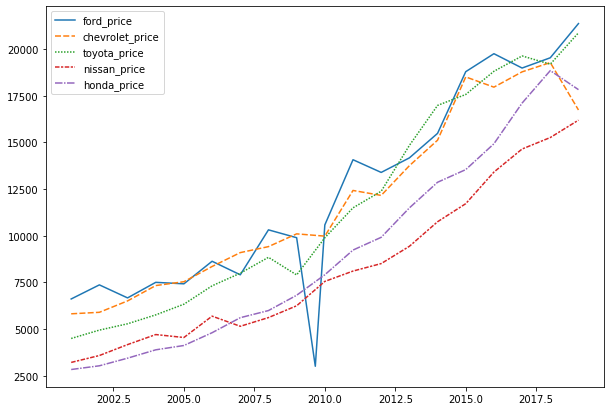

In [52]:
#line plot
dd=[car_price_trend['ford_price'],car_price_trend['chevrolet_price'],car_price_trend['toyota_price'],car_price_trend['nissan_price'],car_price_trend['honda_price']]
plt.figure(figsize=(10,7))
sns.lineplot(data=dd)

### Pick the most popular five manufacturers and compare their market shares in the past 20 years

In [53]:
#filter the year
five_car_20=clean_data[(clean_data['year']>2000)&(clean_data['year']<2020)]
five_car_20.head(5)
df=pd.DataFrame(data=five_car_20)

In [54]:
#filter the manufacturers
df=df.loc[(five_car_20['manufacturer']=='ford')|(df['manufacturer']=='chevrolet')|(df['manufacturer']=='toyota')|(df['manufacturer']=='nissan')|(df['manufacturer']=='honda')]
df.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class
1985,7044062210,vermont,17990,2012.0,ford,f-350 sd,good,160685.0,clean,automatic,4wd,yellow,medium odometer
375857,7044058940,long island,17990,2012.0,ford,f-350 sd,good,160685.0,clean,automatic,4wd,yellow,medium odometer
499049,7047830705,mcallen / edinburg,9377,2004.0,chevrolet,colorado,excellent,150000.0,rebuilt,automatic,rwd,yellow,medium odometer
353099,7038030213,jersey shore,5350,2007.0,ford,expedition,excellent,151443.0,clean,automatic,rwd,yellow,medium odometer
381301,7042446882,rochester,1200,2002.0,ford,ranger edge,excellent,140000.0,clean,automatic,rwd,yellow,medium odometer


In [55]:
df2=df.groupby([ 'year','manufacturer']).size()

In [56]:
df2.head(5)

year    manufacturer
2001.0  chevrolet        974
        ford            1754
        honda            466
        nissan           207
        toyota           744
dtype: int64

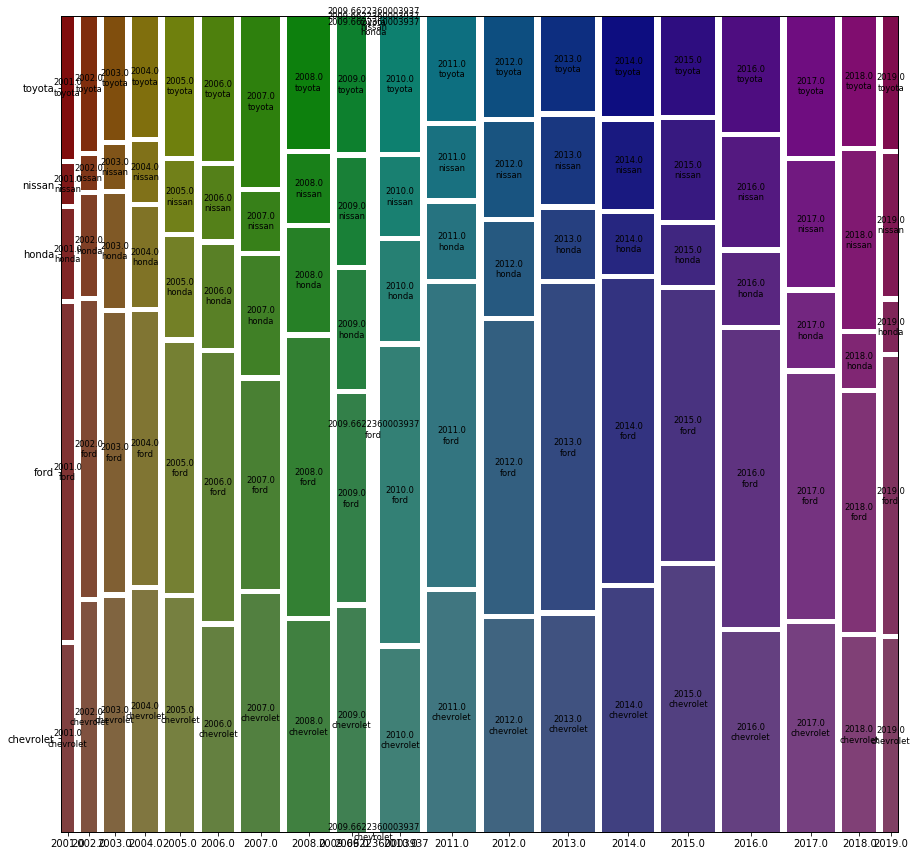

In [70]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df2,gap=0.01)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

### Price distribution of the most popular five manufacturers in 2019 

In [72]:
#filter the year of 2019
five_car_2019=clean_data[clean_data['year']==2019]
five_car_2019.head(5)

#filter the manufacturers
five_car_2019=five_car_2019.loc[(five_car_2019['manufacturer']=='ford')|(five_car_2019['manufacturer']=='chevrolet')|(five_car_2019['manufacturer']=='toyota')|(five_car_2019['manufacturer']=='nissan')|(five_car_2019['manufacturer']=='honda')]
five_car_2019.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class
402767,7047779064,dayton / springfield,9377,2019.0,chevrolet,corvette,excellent,8302.0,clean,automatic,rwd,yellow,low odometer
36323,7047894208,eau claire,17990,2019.0,toyota,camry le,like new,20299.0,clean,automatic,fwd,white,low odometer
337965,7048578744,raleigh / durham / CH,17990,2019.0,nissan,kicks sv,like new,6000.0,clean,automatic,fwd,white,low odometer
202684,7047029440,boise,17550,2019.0,chevrolet,colorado lt,excellent,1381.0,rebuilt,automatic,rwd,white,low odometer
68553,7047053439,tucson,17550,2019.0,chevrolet,colorado lt,excellent,1381.0,rebuilt,automatic,rwd,white,low odometer


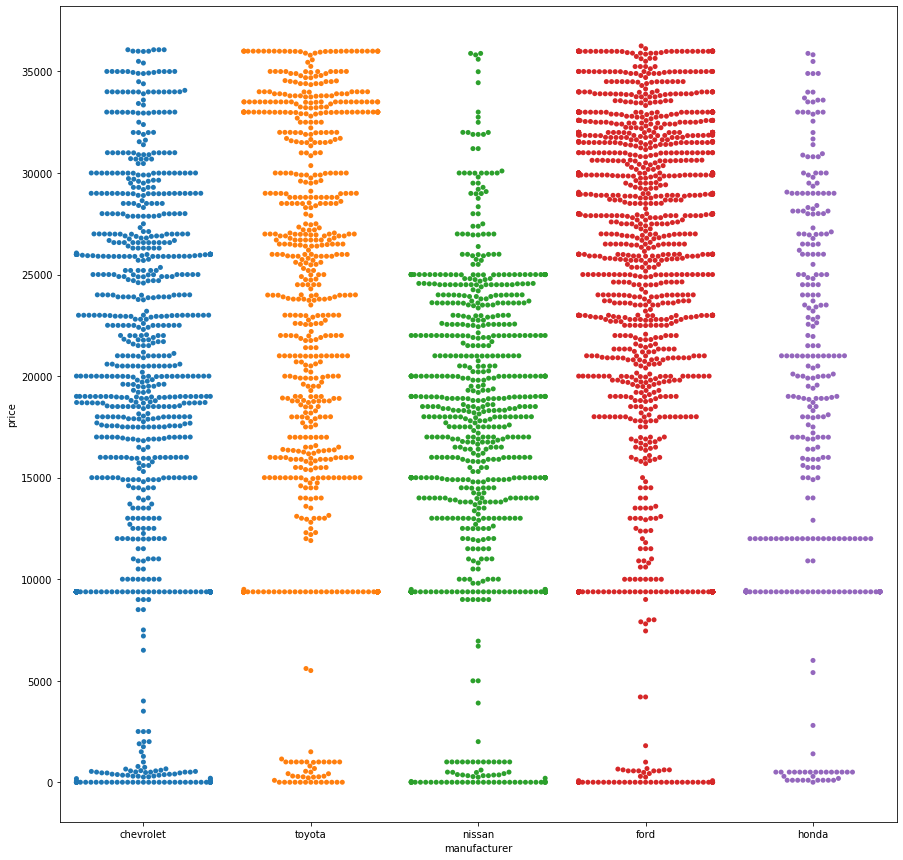

In [73]:
sns.swarmplot(x= 'manufacturer',y='price',data=five_car_2019)
plt.show()

### some charts about Ram

In [ ]:
ram_data.head(5)

In [ ]:
#use seaborn scatter plot to show the price distribution of ram
sns.jointplot(x='price', y='year', data=ram_data, kind='hex', size=(8))

In [ ]:
#use bar chart to show the prices of different colors of ram
ram_data=ram_data.sort_values(by=['paint_color'],ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=ram_data.paint_color, y=ram_data.price,palette='Reds',ci=None)
sns.despine()
plt.xticks(rotation= 90)
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

In [ ]:
ram_data_year=ram_data.pivot_table(ram_data,index=['year'],aggfunc=[np.mean])
ram_data_year.head(5)

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=ram_data_year.index, y=ram_data_year['mean']['price'], ci=None)
sns.despine()
plt.title('ram price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## 3.1 digital processing

In [ ]:
# Thanks to: https://www.kaggle.com/vbmokin/used-cars-price-prediction-by-15-models
#convert index into list
features=clean_data.columns.values.tolist()

In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
column_catagory=[]
for col in features:
    if clean_data[col].dtype in numeric:continue
    column_catagory.append(col)

In [ ]:
# Encoding categorical features
for col in column_catagory:
    if col in clean_data.columns:
        le = LabelEncoder()
        le.fit(list(clean_data[col].astype(str).values))
        clean_data[col] = le.transform(list(clean_data[col].astype(str).values))

In [ ]:
#convert tow columns type into int
clean_data['year'] = (clean_data['year']-1900).astype(int)
clean_data['odometer'] = clean_data['odometer'].astype(int)

In [ ]:
clean_data.head(10)

In [ ]:
clean_data.info()

In [ ]:
clean_data=clean_data[clean_data['price']>2000]
clean_data['odometer'] = clean_data['odometer'] // 5000
clean_data= clean_data[clean_data['year'] > 110]